In [14]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [15]:
def split_trainingData(predictors,target,train_percentage):
    """
    Split the dataset with train_percentage
    :param dataset:
    :param train_percentage:
    :param feature_headers:
    :param target_header:
    :return: train_x, test_x, train_y, test_y
    """
 
    # Split dataset into train and test dataset
    X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, train_size=train_percentage)
    return X_train, X_test, Y_train, Y_test

In [16]:
def predictors_target(data_Train):
    """
    Split the predictors from target values in training dataset
    
    :param training Dataset
    """
    
    predictors = data_Train.iloc[:,1:12]
    target = data_Train.iloc[:,12]
    
    return predictors, target
    

In [17]:
def predictors_test(data_Test):
    """
    Get the predictors in testing dataset
    
    :param testing Dataset
    """
    
    tsetPredictors = data_Test.iloc[:,1:12]
    
    return tsetPredictors

In [18]:
def random_forest_classifier(features, target):
    """
    To train the random forest classifier with features and target data
    :param features:
    :param target:
    :return: trained random forest classifier
    """

    
    param_grid = [
    {
        'n_estimators':list(range(50,510,50)),
        #'max_depth': list(range(50,160,10))
    }]
    
    grid = GridSearchCV(RandomForestClassifier(),cv=5, n_jobs=1, param_grid=param_grid, verbose=0, scoring='accuracy')
    grid.fit(features,target)
    results = pd.DataFrame(grid.cv_results_)
    results.sort_values(by='rank_test_score', inplace=True)
    results.head(5)
    optimised_random_forest = grid.best_estimator_
    return grid

In [19]:
def writeCSV(ID,data,outputFile):
    """
    Write to a csv file
    
    :param ID -->id column 
    :param data -->data to write on a csv file
    :param outputFile --> output file name to write data
    """
    
    df=pd.DataFrame()
    df['Id']=ID
    df['type']=data
    df.to_csv(outputFile,index=0)

C:\Users\Ali\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\Ali\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Ali\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Ali\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be avai

@@@@@@@@@@@@@@@@@@ RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
$$$$$$$$$$$$$$$$$$ 0.9933774834437086
***************** 0.9950980392156863


C:\Users\Ali\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Ali\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Ali\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Ali\Anaconda3\lib\site-packages\sklearn\utils\deprec

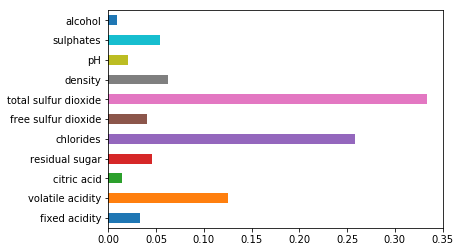

In [20]:
# Main Function
def main():
    """
    Main function
    :return:
    """
    # Load the csv file into pandas dataframe
    data_Samp=pd.read_csv("C:/Users/Ali/Documents/GitHub/ECEN689-Fall2018/Challenges/4Files/winequality-combined-sample.csv")
    data_Train=pd.read_csv("C:/Users/Ali/Documents/GitHub/ECEN689-Fall2018/Challenges/4Files/winequality-combined-training.csv")
    data_Test=pd.read_csv("C:/Users/Ali/Documents/GitHub/ECEN689-Fall2018/Challenges/4Files/winequality-combined-testing.csv")
    
    # Split Data for Predictors and Target
    predictors,target= predictors_target(data_Train)
    
    # Split Training data into train and test datasets
    X_train, X_test, Y_train, Y_test= split_trainingData(predictors, target, 0.8)
   
    # Training a model. Change the Function Name for the model you want
    trained_model= random_forest_classifier(X_train,Y_train)
    print("@@@@@@@@@@@@@@@@@@",trained_model.best_estimator_)
    print("$$$$$$$$$$$$$$$$$$",trained_model.best_score_)
    
    # Prediction on Validation Data
    Y_pred= trained_model.predict(X_test)
    
    # Calculating Accuracy on Validation data set
    score = accuracy_score(Y_test,Y_pred)
    print("*****************",score)
    
    # Prediction on Test Data
    X_train=data_Train.iloc[:,1:12]
    Y_train=data_Train.iloc[:,12]
    testPredictors=predictors_test(data_Test)

    trained_model= random_forest_classifier(X_train,Y_train)
    trained_model.fit(X_train,Y_train)
    importances = trained_model.best_estimator_.feature_importances_
    Y_pred_test= trained_model.predict(testPredictors)
    
    #Plotting Important features of classifier
    (pd.Series(trained_model.best_estimator_.feature_importances_, index=X_train.columns).plot(kind='barh'))
    
    # Writing to a csv file
    outputFile='winequality-combined-solution_V5.csv'
    writeCSV(data_Test['Id'],Y_pred_test,outputFile)
    
    
    
if __name__ == "__main__":
    main()